In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
1+1 

2

In [4]:
from github import Github

In [5]:
g = Github("username", "password")

In [6]:
repo = g.get_repo("CSSEGISandData/COVID-19")

In [7]:
contents = repo.get_contents("")

In [8]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


In [9]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


In [10]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [11]:
count = 1
for index in contents:
    url = index.download_url
    print(count, url)
    count = count + 1

1 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
2 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
3 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
4 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
5 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
6 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
7 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
8 https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_d

In [12]:
import bs4 as bs
import urllib.request

In [13]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []
files    = []

days     = 0

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        files.append(decoded_data)   
        days = days + 1

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

In [16]:
print(files[1])

﻿Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
Anhui,Mainland China,1/23/20 17:00,9,,
Beijing,Mainland China,1/23/20 17:00,22,,
Chongqing,Mainland China,1/23/20 17:00,9,,
Fujian,Mainland China,1/23/20 17:00,5,,
Gansu,Mainland China,1/23/20 17:00,2,,
Guangdong,Mainland China,1/23/20 17:00,32,,2
Guangxi,Mainland China,1/23/20 17:00,5,,
Guizhou,Mainland China,1/23/20 17:00,3,,
Hainan,Mainland China,1/23/20 17:00,5,,
Hebei,Mainland China,1/23/20 17:00,1,1,
Heilongjiang,Mainland China,1/23/20 17:00,2,,
Henan,Mainland China,1/23/20 17:00,5,,
Hong Kong,Hong Kong,1/23/20 17:00,2,,
Hubei,Mainland China,1/23/20 17:00,444,17,28
Hunan,Mainland China,1/23/20 17:00,9,,
Inner Mongolia,Mainland China,1/23/20 17:00,,,
Jiangsu,Mainland China,1/23/20 17:00,5,,
Jiangxi,Mainland China,1/23/20 17:00,7,,
Jilin,Mainland China,1/23/20 17:00,1,,
Liaoning,Mainland China,1/23/20 17:00,3,,
Macau,Macau,1/23/20 17:00,2,,
Ningxia,Mainland China,1/23/20 17:00,1,,
Qinghai,Mainland China,1/23/20 1

In [17]:
# This function is used to modifiy a string where a comma exists between to quotes
# ["Miami,Fl",US,2,3,4,6] becomes ["Miami Fl",US,2,3,4,6]
#
# This is needed because there are fields in the CSV file with commas,
# and this throws off the array split function
#
# Function : StringFix
def strfix(value):
    nl = ''
    flag = bool(False)
    for i in range(0,len(value)):
        if (value[i].find('"')>=0):
            flag = not(bool(flag))            
        if( (value[i]==",") and (flag==True) ):
            nl = nl + ' '
        else:
            nl = nl + value[i]             
    return(nl)

In [26]:
# Dictionaries
#
conf_dict     = {}   # dictionary of confirmed per city
death_dict    = {}   # dictionary of deaths per city
rec_dict      = {}
country_dict  = {}

sample = 0

# Collect postion vs confirmation
lat         = []
lon         = []
con         = []

# Print Sample events of death reporting
#
for index in range(0,len(files)):
        
    # Take the long string and split it for every newline character \n
    file = files[index].split('\n')
       
    CNT        = 0 
    state      = 0
    confirmed  = 0
    death      = 0
    recovered  = 0
    date       = 0
    latitude   = 0
    longitude  = 0  
    
    # Now iterate for every line in the array called "array"
    for line in file: 
        
        # Use the first line for index location, this is highly needed
        # because the location of the reuired elements changes throughout time
        # in the files, and is not consistent.
        if (line.find("Confirmed")>=0):
            newline = line.strip('\r')
                     
            newline = strfix(newline)
            data = newline.split(',')
            
            new_fields = len(data)
                     
            for i in range(0,new_fields):
                if (data[i].find("Country")>=0): 
                    CNT        = i 
                elif (data[i].find("State")>=0): 
                    state      = i
                elif (data[i].find("Confirmed")>=0): 
                    confirmed  = i
                elif (data[i].find("Death")>=0): 
                    death      = i
                elif (data[i].find("Recovered")>=0): 
                    recovered  = i
                elif (data[i].find("Update")>=0): 
                    date       = i
                elif (data[i].find("Lat")>=0): 
                    latitude   = i
                elif (data[i].find("Long")>=0): 
                    longitude  = i   
                             
        # Make sure its not the first line that has a text header and no valuable data
        else:
                
            # Remove any \r delimiter characters. Google what \r and \n are
            # used for. Traditionaly they are used to indicate the end of a line.
            # Sometimes only one is used, and sometimes both are used. In this
            # case they are both used, and we already split the lines based on \n
            # which means we need to strip the special character from each line.
            newline = line.strip('\r')
                
            # Finally append the new line to the array called all_data
            newline = strfix(newline)
            data = newline.split(',')
            
            #print(data)
            #print(len(data))
            
            if (len(data)>=6):
                
                # Correct all of the running name chnages that have occurred over time.
                #
                # China was renamed from "Mainland China" to "China"
                # This corrects that.
                cnt = data[CNT]
                if ("China" in cnt) : cnt = "China"
                if ("Kong" in cnt)  : cnt = "China"
                if ("Korea" in cnt) : cnt = "South Korea"
                    
                key = cnt + "-" + str(data[state])
                
                # Build country dictionary, will latter be forced to fix size
                # what is pushed is not important
                country_dict.setdefault(cnt, []).append(0)
                  
                # Does the confirmed field have a number, sometimes it is '', empty
                if(len(data[confirmed]) > 0):
                    # Is the number greater than zero
                    if (int(data[confirmed]) > 0):
                        conf_dict.setdefault(key, []).append([sample,int(data[confirmed])])
                    else:
                        conf_dict.setdefault(key, []).append([sample,0])
                else:
                    conf_dict.setdefault(key, []).append([sample,0])
                    
                # Does the death field have a number, sometimes it is '', empty
                if(len(data[death]) > 0):
                    # Is the number greater than zero
                    if (int(data[death]) > 0):
                        death_dict.setdefault(key, []).append([sample,int(data[death])])
                    else:
                        death_dict.setdefault(key, []).append([sample,0]) 
                else:
                    death_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does the recovered field have a number, sometimes it is '', empty
                if(len(data[recovered]) > 0):
                    # Is the number greater than zero
                    if (int(data[recovered]) > 0):
                        rec_dict.setdefault(key, []).append([sample,int(data[recovered])])
                    else:
                        rec_dict.setdefault(key, []).append([sample,0]) 
                else:
                    rec_dict.setdefault(key, []).append([sample,0])
                    
                    
                # Does Latitude have a valid positive number for continental US only
                if ((len(data[longitude]) > 0) and (longitude > 0) ):
                              
                    # Does Longitude have a negative number for continental US only
                    if (float(data[longitude]) < 0.0):  # eliminate Guam
                    
                        # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                        # The number confirmed will be used for the size of the red dot.
                        con.append(float(data[confirmed]))
                        lat.append(float(data[latitude]))
                        lon.append(float(data[longitude]))
                    
    sample = sample + 1


In [67]:
country_conf_dict  = {}
country_death_dict = {}
country_rec_dict   = {}
country_perc_dict  = {} 

print(days)
    
# Reset totals for country dictionary
for CNT in country_dict:
    country_conf_dict[CNT]  = np.zeros(days)  
    country_death_dict[CNT] = np.zeros(days)
    country_rec_dict[CNT]   = np.zeros(days)
    country_perc_dict[CNT]  = np.zeros(days)
   
# Daily total for all of the cities summed together
for city in conf_dict:
    CNT = city.split('-')[0]
 
    if (CNT in country_dict):
        for i in range(0,len(conf_dict[city])):
            cs = conf_dict[city][i][0]
            cv = conf_dict[city][i][1] 
            ds = death_dict[city][i][0]
            dv = death_dict[city][i][1] 
            rs = rec_dict[city][i][0]
            rv = rec_dict[city][i][1] 
            country_conf_dict[CNT][ cs ] = int(country_conf_dict[CNT][ cs ]) + int( cv )
            country_death_dict[CNT][ ds ] = int(country_death_dict[CNT][ ds ]) + int( dv )
            country_rec_dict[CNT][ rs ] = int(country_rec_dict[CNT][ rs ]) + int( rv )

# Look for unreported gaps is extend last measurement
# ....106. 108. 147. 171. 171. 171. 348.] becomes
# ....106. 108. 147. 171.  0.    0. 348.]
#
for CNT in country_dict:
    for i in range(0,len(country_rec_dict[CNT])):
        if (country_rec_dict[CNT][i] == 0) and (country_rec_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found recovered gaps for " + CNT + ", and corrected" )
             country_rec_dict[CNT][ i ] = country_rec_dict[CNT][ (i - 1) ]
        if (country_conf_dict[CNT][i] == 0) and (country_conf_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_conf_dict[CNT][ i ] = country_conf_dict[CNT][ (i - 1) ]
        if (country_death_dict[CNT][i] == 0) and (country_death_dict[CNT][i-1] > 0) and (i>=1):
             #print("Found confirmed gaps for " + CNT + ", and corrected" )
             country_death_dict[CNT][ i ] = country_death_dict[CNT][ (i - 1) ]
            
for CNT in country_dict:
    for i in range(0,len(country_perc_dict[CNT])):
        # Check to avoid divde by zero
        if (country_conf_dict[CNT][i] > 0.0):
            country_perc_dict[CNT][i] = (country_death_dict[CNT][i] / country_conf_dict[CNT][i]) * 100.0
        else:
            country_perc_dict[CNT][i] = 0.0
    
for CNT in country_dict:
    print(CNT)
    print(country_conf_dict[CNT])
    print(country_death_dict[CNT])
    print(country_rec_dict[CNT])
    print(country_perc_dict[CNT])   

63
China
[  547.   641.   918.  1404.  2070.  2871.  5502.  6080.  8134.  9795.
 11884. 16622. 19708. 23697. 27430. 30577. 34100. 36804. 39819. 42344.
 44376. 44749. 59885. 66348. 68403. 70503. 72424. 74201. 74609. 75067.
 75540. 76991. 77012. 77231. 77744. 78156. 78590. 78918. 79346. 79922.
 80126. 80251. 80376. 80527. 80680. 80760. 80813. 80850. 80877. 80921.
 80932. 80945. 80977. 81003. 81033. 81058. 81102. 81156. 81250. 81305.
 81397. 81496. 81591.]
[  17.   18.   26.   42.   56.   82.  131.  133.  171.  213.  259.  361.
  425.  491.  563.  633.  718.  805.  905. 1012. 1112. 1117. 1369. 1521.
 1663. 1766. 1864. 2003. 2116. 2238. 2238. 2443. 2445. 2595. 2665. 2717.
 2746. 2790. 2837. 2872. 2914. 2947. 2983. 3015. 3044. 3072. 3100. 3123.
 3139. 3161. 3172. 3180. 3193. 3203. 3217. 3230. 3241. 3249. 3253. 3259.
 3265. 3274. 3281.]
[2.8000e+01 3.0000e+01 3.6000e+01 3.9000e+01 4.9000e+01 5.8000e+01
 1.0100e+02 1.2000e+02 1.3500e+02 2.1400e+02 2.7500e+02 4.6300e+02
 6.1400e+02 8.4300e+02 

  39.  53.  75.  88. 113. 133. 164.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
"Gambia  The"
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
"Bahamas  The"
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

In [68]:
print(rec_dict['US-"Hillsborough  FL"'])
#print(rec_dict.keys())
print(country_rec_dict['US'])

[[40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0]]
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   3.   3.   3.   3.   3.   3.   3.   3.   3.   3.
   3.   3.   5.   5.   5.   5.   6.   6.   6.   7.   7.   7.   7.   8.
   8.   8.   8.   8.   8.   8.   8.   8.  12.  12.  12.  12.  17.  17.
 106. 108. 147. 171. 171. 171. 348.]


In [20]:
# Print the total number of reporting days we have
print(days)

63


<IPython.core.display.Javascript object>


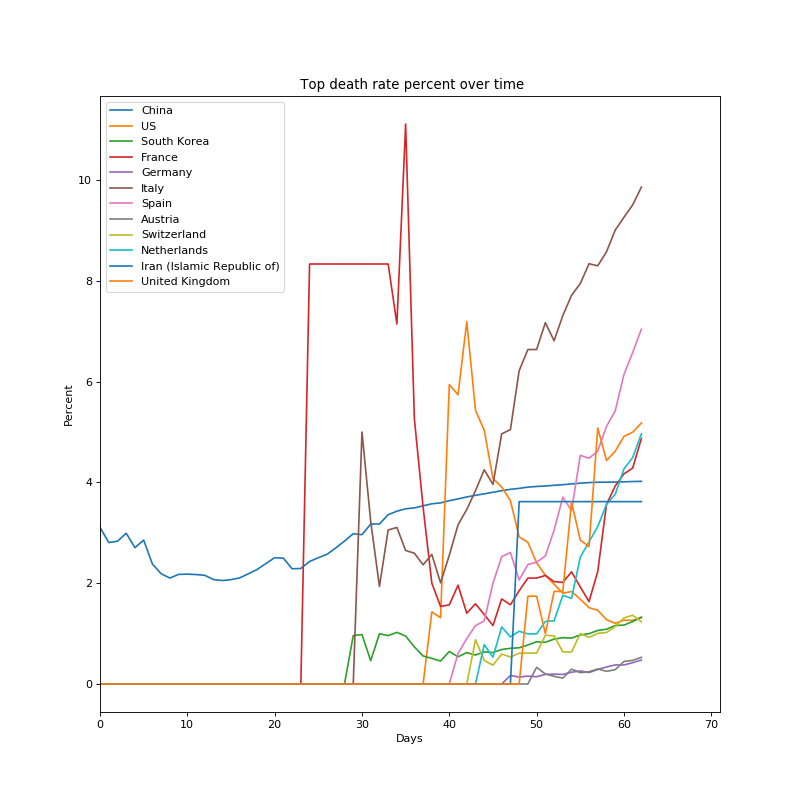

In [69]:
fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Top death rate percent over time")
ax.set_ylabel("Percent")
ax.set_xlabel("Days")

exclude_list = ['Iran', 0.0]   
    
# Daily total for all of the cities summed together
for CNT in country_conf_dict: 
    if (country_conf_dict[CNT][days-1] > 5000) and not(CNT in str(exclude_list)): 
        x = range(0,len(country_perc_dict[CNT]))
        y = country_perc_dict[CNT]  
        ax.plot(x,y, label=CNT)
        ax.grid
    
plt.legend(loc="upper left")



<IPython.core.display.Javascript object>


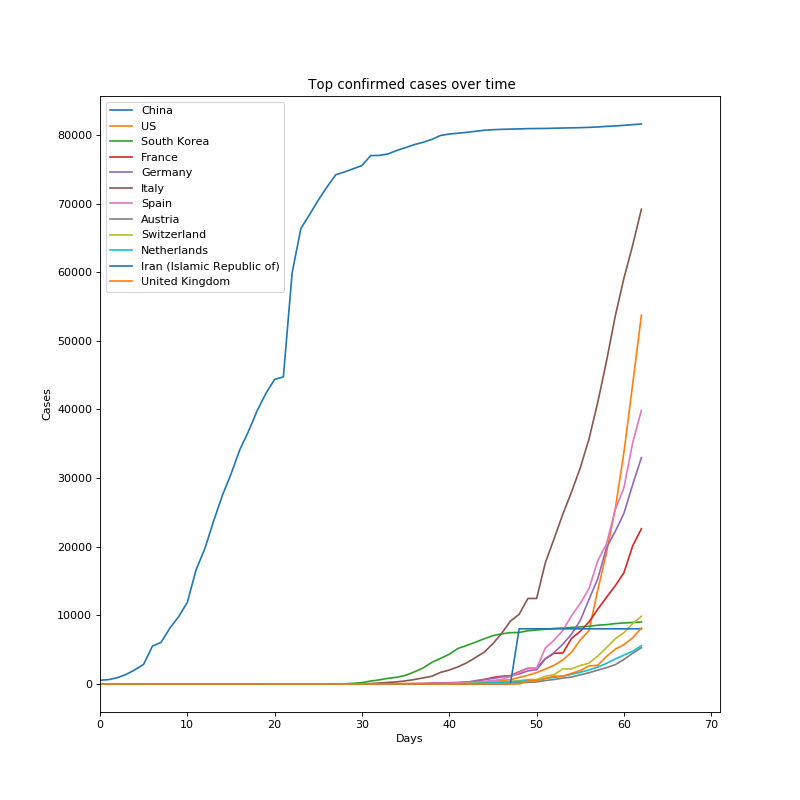

In [70]:
fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Top confirmed cases over time")
ax.set_ylabel("Cases")
ax.set_xlabel("Days")

exclude_list = ['Iran', 0.0]
                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (country_conf_dict[CNT][days-1] > 5000) and not(CNT in str(exclude_list)): 
    #if ("Mainland"in CNT):
        x = range(0,len(country_perc_dict[CNT]))
        y = country_conf_dict[CNT]                
        ax.plot(x,y, label=CNT)
        ax.grid
    
plt.legend(loc="upper left")  

<IPython.core.display.Javascript object>


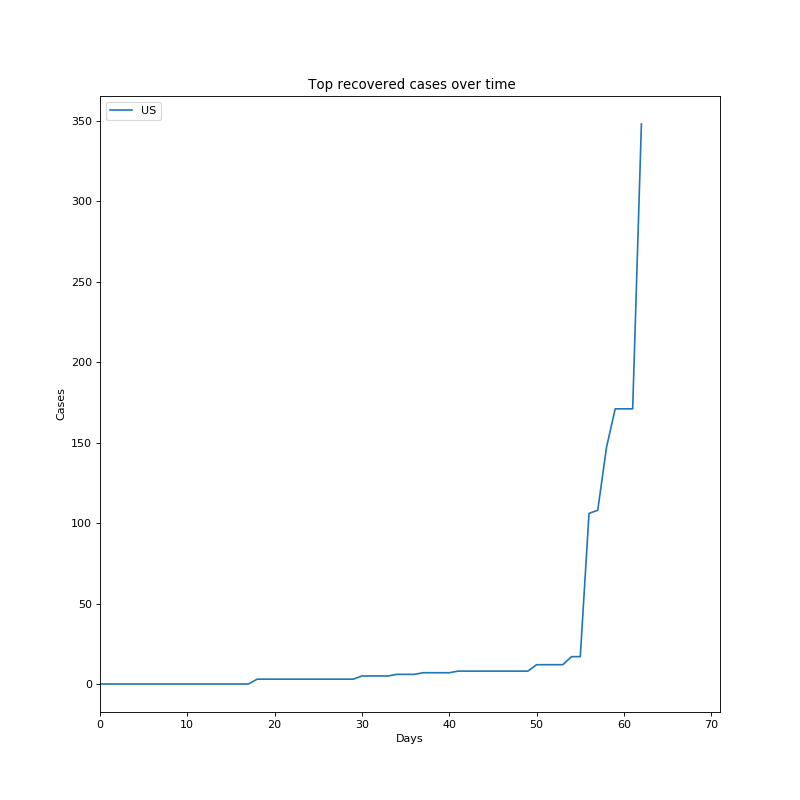

In [71]:
fig, ax = plt.subplots(figsize = (10,10))  
ax.set_xlim(0, days+8)
ax.set_title(" Top recovered cases over time")
ax.set_ylabel("Cases")
ax.set_xlabel("Days")

exclude_list = ['Iran', 'China', 'Japan', 'Italy']
                        
# Daily total for all of the cities summed together
for CNT in country_conf_dict:
    if (country_conf_dict[CNT][days-1] > 0) and not(CNT in str(exclude_list)): 
        if ("US" in CNT):
            x = range(0,len(country_perc_dict[CNT]))
            y = country_rec_dict[CNT]                
            ax.plot(x,y, label=CNT)
            ax.grid
    
plt.legend(loc="upper left")  

In [23]:
# What is the bounding box for the map
BBox = ( float(min(lon, key=float)),float(max(lon, key=float)), float(min(lat, key=float)),float(max(lat, key=float)) )
print(BBox)

# Print all of the coordinants
for i in range(len(lon)):
    print(con[i],lon[i], lat[i])

(-170.132, -1.0232, -38.4161, 72.0)
84.0 -4.0 40.0
36.0 -3.0 55.0
14.0 -79.3832 43.6532
9.0 -122.3321 47.6062
8.0 -123.1207 49.2827
6.0 -78.1834 -1.8312
5.0 -102.0 23.0
3.0 -19.0208 64.9631
3.0 -87.6298 41.8781
3.0 -121.9552 37.3541
2.0 -51.9253 -14.235
2.0 -121.3542 38.4747
2.0 -120.9876 36.5761
2.0 -117.1611 32.7157
2.0 -121.8339 48.033
1.0 -73.5673 45.5017
1.0 -81.2453 42.9849
1.0 -70.1627 18.7357
1.0 -7.6921 53.1424
1.0 -71.0589 42.3601
1.0 -123.8695 40.745
1.0 -118.2437 34.0522
1.0 -89.4012 43.0731
1.0 -117.8531 33.7879
1.0 -122.675 45.5051
1.0 -71.4128 41.824
1.0 -98.4936 29.4241
1.0 -111.94 33.4255
0.0 -98.6134 29.3829
0.0 -95.9758 41.2545
0.0 -121.9399 38.2721
120.0 -4.0 40.0
40.0 -3.0 55.0
17.0 -79.3832 43.6532
14.0 -121.9836 47.548
9.0 -121.9552 37.3541
8.0 -123.1207 49.2827
6.0 -78.1834 -1.8312
6.0 -19.0208 64.9631
5.0 -102.0 23.0
4.0 -87.6976 41.7377
4.0 -121.8339 48.033
2.0 -51.9253 -14.235
2.0 -8.2245 39.3999
2.0 -122.675 45.5051
2.0 -71.4128 41.824
2.0 -121.3542 38.4747


1.0 -81.2546 19.3133
1.0 -5.5471 7.54
1.0 -68.99 12.1696
1.0 -62.8333 17.9
3.0 -61.551 16.265
1.0 -90.2308 15.7835
1.0 -2.58 49.45
1.0 -9.6966 9.9456
1.0 -10.9408 21.0079
2.0 -60.9789 13.9094
1.0 -61.2872 12.9843
1.0 -56.0278 3.9193
1.0 -152.4044 61.3707
1.0 -99.784 47.5289
1.0 -64.8963 18.3358
1.0 -5.3536 36.1408
0.0 -80.9545 38.4912
9942.0 -3.7492 40.4637
1543.0 -3.436 55.3781
967.0 -74.9481 42.1657
904.0 -121.4905 47.4009
557.0 -119.6816 36.1162
331.0 -8.2245 39.3999
200.0 -51.9253 -14.235
197.0 -71.5301 42.2302
180.0 -19.0208 64.9631
178.0 -74.521 40.2989
177.0 -85.3232 51.2538
169.0 -7.6921 53.1424
160.0 -105.3111 39.0598
155.0 -71.543 -35.6751
155.0 -81.6868 27.7663
136.0 -91.8678 31.1695
121.0 -83.6431 33.0406
105.0 -88.9861 40.3495
103.0 -127.6476 53.7267
86.0 -75.0152 -9.19
85.0 -97.5635 31.0545
77.0 -77.2098 40.5908
56.0 -63.6167 -38.4161
56.0 -116.5765 53.9333
55.0 -80.7821 8.538
54.0 -74.2973 4.5709
54.0 -93.9002 45.6945
53.0 -102.5528 23.6345
53.0 -84.5361 43.3266
52.0 -86

24.0 -81.14882926 28.06312234
19.0 -81.24060348 28.7158582
16.0 -81.43589967 29.90096506
15.0 -82.33174248 27.18546175
14.0 -86.59267105 30.69143028
14.0 -81.18263252 29.05858895
13.0 -82.31831044 27.47196942
11.0 -82.40227529 28.30810945
11.0 -81.69732947 27.95027105
8.0 -82.47614748 28.84804315
8.0 -80.60556721 27.69308961
7.0 -81.85609986 29.98319144
7.0 -80.73091022 28.29409504
6.0 -81.7125123 28.76202069
5.0 -84.27491114 30.45955727
5.0 -82.0794267 28.70181754
5.0 -82.42700204 28.55364461
4.0 -87.02458128 30.6934145
4.0 -87.37284571 30.67652764
4.0 -86.16935664 30.64204028
3.0 -82.05803627 29.21227113
3.0 -80.47106649 27.37763908
2.0 -81.92949121 26.90131002
2.0 -80.43109784 27.0772071
2.0 -82.28467476 30.33060121
2.0 -81.74230285 29.60779729
2.0 -82.62160164 30.22509788
1.0 -84.61915825 30.57796289
1.0 -81.80297522 30.61037141
1.0 -85.21500423 30.7954597
1.0 -81.07812416 25.20904673
1.0 -85.62122584 30.26548745
1.0 -81.34071957 27.34254618
1.0 -82.16611613 29.95079741
1.0 -81.315

0.0 -99.87284448 38.91467218
0.0 -96.20350509 38.95471985
0.0 -101.7638876 38.91686134
0.0 -97.0875323 39.78420784
0.0 -101.3471509 38.48178252
0.0 -95.74323255 37.55937174
0.0 -95.74006277 37.8865336
0.0 -85.28129668 37.10459774
0.0 -86.19457544 36.75197631
0.0 -88.99427697 37.05842757
0.0 -85.93338945 36.96469836
0.0 -83.74588932 38.14735938
0.0 -83.67766671 36.73355174
0.0 -84.72615357 38.97065142
0.0 -82.68652187 38.36176608
0.0 -84.8633779 37.62680923
0.0 -84.08532444 38.69158994
0.0 -83.31959161 37.52333168
0.0 -86.42885017 37.77377239
0.0 -85.68955617 37.97162523
0.0 -86.68748787 37.20946153
0.0 -87.86948214 37.14749129
0.0 -84.37875208 38.94384345
0.0 -88.9669222 36.85372876
0.0 -85.12601074 38.66599534
0.0 -83.05092385 38.31690743
0.0 -84.92726209 37.32533118
0.0 -83.712575 37.16451126
0.0 -85.13377529 36.72581156
0.0 -88.0882609 37.35839237
0.0 -85.39050034 36.78926125
0.0 -86.23955613 37.21218923
0.0 -83.09771563 38.11624059
0.0 -83.95956369 37.69241417
0.0 -83.69657514 38.3

0.0 -88.36363591 46.6720582
0.0 -98.68460053 37.2288586
0.0 -85.3871286 31.868263
0.0 -80.00350858 39.1307219
0.0 -98.06605978 46.93579637
30.0 -70.28854339 41.72980578
0.0 -81.43584352 33.26679302
0.0 -85.93338945 36.96469836
0.0 -91.84833627 45.42372701
1.0 -83.71436292 33.99148694
1.0 -85.30834519 42.59513984
0.0 -93.82919888 36.70978521
5.0 -85.89558181 39.20744865
0.0 -98.75636726 38.47889676
0.0 -94.34757022 37.50207671
61.0 -84.83887523 34.23732119
0.0 -97.31206354 30.10370699
1.0 -94.34113157 38.25271289
0.0 -83.74588932 38.14735938
0.0 -79.73912095 38.05852573
0.0 -92.33782872 36.28784385
1.0 -85.62122584 30.26548745
2.0 -83.98731479 43.70639106
1.0 -91.19716729 46.52868768
0.0 -99.21352901 33.61640794
12.0 -98.27858469 44.41464384
0.0 -111.32892379999998 42.28269683
0.0 -76.84325809 35.48531943
21.0 -80.72619758 32.39226291
1.0 -93.34173616 30.64836518
0.0 -100.4758872 36.7496847
3.0 -80.34921611 40.6825484
0.0 -113.2342232 38.35657051
0.0 -112.89846940000001 45.13434354
0.0 

4.0 -69.76738544 44.40759555
12.0 -88.04051686 42.57639354
6.0 -75.56884914 39.08646628
0.0 -76.04741541 39.24976208
28.0 -85.54934642 43.03197711
7.0 -71.57641596 41.67106337
0.0 -100.7780939 33.18104136
5.0 -84.53241199 38.93950319
0.0 -92.1785067 41.33649833
12.0 -118.72777959999999 35.34329425
0.0 -99.34930144 30.06040006
54.0 -80.58763164 34.33988254
6.0 -130.975561 55.57445008
0.0 -87.61468386 44.51727459
0.0 -88.41434263 47.63197653
0.0 -99.71343729 42.87990694
0.0 -99.77507857 46.97830064
0.0 -103.7148131 41.19774275
0.0 -99.74856473 30.48678918
0.0 -100.2558057 33.61643847
1170.0 -121.8346131 47.49137892
0.0 -77.15852768 38.26818502
0.0 -77.09384941 37.70965316
0.0 -76.88689628 37.71044922
0.0 -97.94193268 35.94530008
0.0 -98.13638678 37.55909527
0.0 -119.8159973 36.07409056
0.0 -73.94935552 40.636182500000004
0.0 -97.4913945 44.36956169
0.0 -100.41866379999999 29.34967888
0.0 -102.7392145 38.43260896
0.0 -99.2856537 37.55848695
0.0 -98.97720696 34.91671958
0.0 -102.6022199000

25.0 -119.6631594 40.66562265
42.0 -83.83853204 42.253105
2.0 -81.70033724 36.23103603
0.0 -94.61413846 43.97823903
31.0 -88.30431188 43.01833055
0.0 -88.96534501 44.47068056
0.0 -89.24317107 44.11324419
0.0 -81.91894878 31.5521809
0.0 -88.42586459 38.42955355
1.0 -85.01044989 39.863344399999995
0.0 -93.32752197 40.73969028
0.0 -84.8251971 36.80310688
638.0 -83.281255 42.28098405
0.0 -88.69573913 31.64135687
0.0 -90.46001416 37.11303869
0.0 -97.11926964 42.20934475
3.0 -77.02976528 43.15494365
1.0 -78.00027268 35.36438125
0.0 -81.88844833 40.82925852
3.0 -75.29956506 41.64938475
0.0 -87.78644456 35.23868267
0.0 -110.9096801 38.32335822
0.0 -82.42287994 38.14901357
0.0 -78.90293905 38.06451466
1.0 -88.71990865 36.29896232
4.0 -99.33237355 27.7610369
8.0 -111.9145117 41.27116049
0.0 -84.54742852 32.04066113
0.0 -94.17987389 42.42853483
0.0 -87.67989953 37.52168356
3.0 -93.33121835 32.70847669
1.0 -89.28392912 33.61300486
0.0 -92.876329 37.2813734
0.0 -98.50019851 40.17642643
0.0 -80.4202

0.0 -94.36934071 32.54935988
2.0 -80.37919577 39.2853852
1.0 -78.87536254 38.43542574
0.0 -82.96567682 34.34626973
0.0 -85.88461055 37.29943898
88.0 -72.73103891 41.80283011
0.0 -102.6029022 35.84008013
0.0 -97.42747573 38.04293782
0.0 -100.8710738 37.562039399999996
0.0 -95.11513306 35.22257600000001
0.0 -99.73037358 33.17823584
2.0 -155.5210167 19.60121157
0.0 -82.94885298 36.44355426
0.0 -101.0603568 40.52451972
7.0 -98.02944344 30.05669873
0.0 -82.98196486 35.55269063
0.0 -89.28536625 35.58332824
1.0 -85.12886832 33.29686567
0.0 -100.2703577 35.83764858
1.0 -93.66935133 33.73325583
0.0 -90.92491462 40.81908672
2.0 -87.57392021 37.79344553
2.0 -82.4766782 35.33788927
0.0 -88.38600175 35.65581134
0.0 -95.85846587 32.21128872
13.0 -86.51037283 39.76719009
0.0 -81.16469006 26.55386945
103.0 -93.47694895 45.00761521
14.0 -77.39326555 37.53460572
0.0 -85.24267944 31.51148016
13.0 -84.14814659999998 33.4533428
0.0 -90.13296166 41.3533994
0.0 -85.39625719 39.93029017
1.0 -91.54436349 40.98

0.0 -84.20258189 40.33163494
135.0 -89.89692423 35.1864775
0.0 -94.14550696 31.79211404
0.0 -78.56813762 38.85905135
1.0 -93.77617511 45.44447208
0.0 -100.44182590000001 39.35018161
0.0 -104.50382900000001 48.72085833
0.0 -102.4126613 42.50284406
0.0 -100.3426391 47.57700669
4.0 -106.8862389 44.79048913
0.0 -101.71976240000001 39.35147699
0.0 -98.97588642 41.22045983
0.0 -120.6827834 45.41501554
0.0 -101.8933156 36.27751473
0.0 -84.14585902 42.95392800000001
0.0 -115.89167490000001 47.35364087
0.0 -94.23164924 44.5796592
0.0 -120.52007009999998 39.57713498
0.0 -107.1925893 33.13028233
2.0 -112.6620092 45.90018933
1.0 -86.58047435 36.74058474
1.0 -89.91716179 31.91282117
1.0 -96.17675679999999 43.08221074
0.0 -103.7576544 42.48932059
0.0 -101.04401490000001 46.11323337
2.0 -122.54074340000001 41.59198861
0.0 -135.3206587 57.24124555
45.0 -121.766131 48.48171488
0.0 -135.33377480000001 59.56149996
0.0 -121.91644029999999 46.02408726
0.0 -103.4601547 46.44737738
0.0 -98.78566062 39.785165

In [24]:
BBox =  (-128, -64, 24, 49)
print(BBox)

(-128, -64, 24, 49)


In [25]:
repo = g.get_repo("ehsintegration/COVID-19")
contents = repo.get_contents("us-map.png")
url = contents.download_url
print(url)
usmap = plt.imread(url)

https://raw.githubusercontent.com/ehsintegration/COVID-19/master/us-map.png


<IPython.core.display.Javascript object>


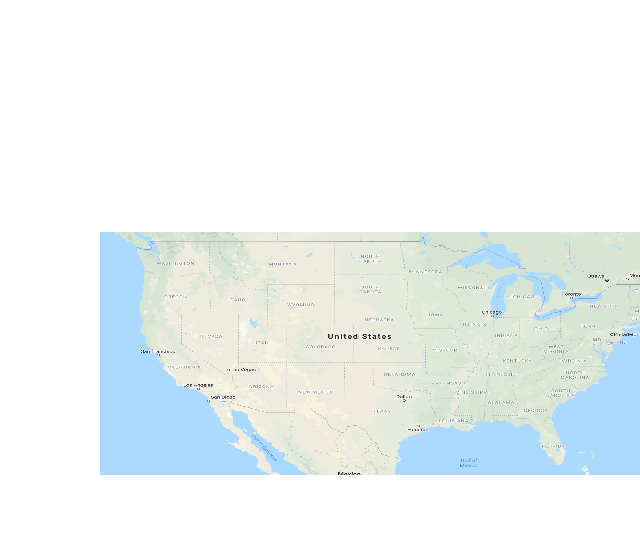

KeyboardInterrupt: 

In [31]:

fig, ax = plt.subplots(figsize = (8,7))
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

plt.ioff()
fig.show()
fig.canvas.draw()
ax.imshow(usmap, extent = BBox, aspect= 'equal')

# Wait so I had time to setup CAMSTASIA
time.sleep(2)

# Get the maximum Confirmed case
mxc = max(con, key=int)

# Iterate through all of the coordinates
for i in range(len(con)):
    
    # This will normalize the confirmed case to 1 , and then multiply by 300
    data_con = (con[i] / mxc) * 300
    
    # Get the current coordinates
    data_lon = lon[i]
    data_lat = lat[i]
    
    ax.scatter(data_lon, data_lat, zorder=1, alpha= 1.0, c='R', s=data_con)
    
    fig.canvas.draw()
    #fig.canvas.flush_events()
    
    # This slows the plot down so that we can see time progress
    # also matplotlib needs a sleep for an continuous plot.
    time.sleep(0.00001)   #sleep

# Wait so I had time to stop CAMSTASIA
time.sleep(3)

# Clear the figure
fig.clf()